# Что такое Natural Language Processing?

Natural Language Processing (далее – NLP) – обработка естественного языка

NLP позволяет применять алгоритмы машинного обучения для текста и речи.

Сегодня у многих из нас есть смартфоны с распознаванием речи – в них используется NLP для того, чтобы понимать нашу речь. Также многие люди используют ноутбуки со встроенным в ОС распознаванием речи.

Примеры:

**Siri:**

<img src="https://tehnot.com/wp-content/uploads/2015/09/IMG_06731.jpg" alt="alt text" width="550" height="20">

**Cortana:**

<img src="https://www.techadvisor.com/cmsdata/slideshow/3633483/disable_cortana_thumb800.png" alt="alt text" width="550" height="20">

**Gmail:**

<img src="https://habrastorage.org/webt/ec/rw/ii/ecrwii6nml6c6uvxn8vensihku0.gif" alt="alt text" width="550" height="20">

# Python-библиотека NLTK

NLP-библиотеки для питона:
* Natural Language Toolkit (NLTK)
* Apache OpenNLP
* Stanford NLP suite
* Gate NLP library
* Spacy
* Yargy
* DeepPavlov
* CLTK (для древних языков)
* и т.д.

Cамый популярный инструмент для создания NLP-программ на Python — NLTK(Natural Language Toolkit). 

В NLTK есть не только различные инструменты для обработки текста, но и данные — текстовые корпуса, предобученные модели для анализа тональности и морфологической разметки, списки стоп-слов для разных языков и т.п.

In [1]:
import nltk
# nltk.download()

# Загрузка и отображение данных


In [2]:
import urllib

In [3]:
url = "http://textfiles.com/science/blackhol.txt"
file = urllib.request.urlopen(url)
text = open("text.txt","w")

In [4]:
for line in file:
    decoded_line = line.decode("utf-8")
    text.write(str(decoded_line))

In [5]:
# массив предложений

In [6]:
f = open('text.txt', "r")
default_text = f.read()
print(default_text)

                           Combat Arms
                         2869 Grove Way
              Castro Valley, California 94546-6709
                    Telephone (415) 538-6544


     The following material was downloaded from the NASA SpaceLink
BBS at the National Aeronautics and Space Administration, George C.
Marshall Space Flight Center, Marshall Space Flight Center, Alabama
35812 on 11/16/88.



B L A C K    H O L E S    I N    S P A C E
-------------------------------------------------------------
 
     There is much more to black holes than meets the eye.  In fact,
your eyes, even with the aid of the most advanced telescope, will
never see a black hole in space.  The reason is that the matter
within a black hole is so dense and has so great a gravitational pull
that it prevents even light from escaping.
 
     Like other electromagnetic radiation (radio waves, infrared
rays, ultraviolet radiation, X-rays, and gamma radiation), light is
the fastest traveler in the Universe.  It mo

In [7]:
len(default_text)

8067

In [8]:
default_text[:300]

'                           Combat Arms\n                         2869 Grove Way\n              Castro Valley, California 94546-6709\n                    Telephone (415) 538-6544\n\n\n     The following material was downloaded from the NASA SpaceLink\nBBS at the National Aeronautics and Space Administration'

## Специальные символы 


|символ|описание|
|------|--------|
|. | один любой символ, кроме новой строки \n |
|? | 0 или 1 вхождение шаблона слева |
|+ | 1 и более вхождений шаблона слева|
|* | 0 и более вхождений шаблона слева|
|\w| любая цифра или буква |
|\W| всё, кроме цифры или буквы|
|\d| любая цифра|
|\D| всё, кроме цифры|
|\s| любой пробельный символ|
|\S| любой непроблеьный символ|
|\b| граница слова|
|[..]| Один из символов в скобках|
|[^..] | Любой символ, кроме тех что в скобках|
|\ | Экранирование специальных символов (точки плюсы и тп)|
|^и$| Начало и конец строки соответственно |
|{n,m}| От n до m вхождений |
|{,m} | От 0 до m вхождений |
| a \| b | Соответствует a или b |
| (  ) | Группирует выражение и возвращает найденный текст| 
| \t \n \r | табуляция, новая строка, возврат каретки | 



Выдержка из [документации Python](https://docs.python.org/3/library/re.html?highlight=regex):

> Регулярные выражение используют обратный слеш (\) для обозначения специальных форм или чтобы разрешить использование спецсимволов. Это противоречит использованию обратного слеша в Python: например, чтобы буквально обозначить обратный слеш, необходимо написать '\\\\' в качестве шаблона для поиска, потому что регулярное выражение должно выглядеть как \\, где каждый обратный слеш должен быть экранирован.

> Решение – использовать нотацию raw string для шаблонов поиска; обратные слеши не будут особым образом обрабатываться, если использованы с префиксом ‘r’. Таким образом, r”\n” – это строка с двумя символами (‘\’ и ‘n’), а “\n” – строка с одним символом (перевод строки).

# Предварительная обработка (препроцессинг) текста
Для проведения частотного анализа и определения тематики текста рекомендуется выполнить очистку текста от знаков пунктуации, лишних пробельных символов и цифр. Сделать это можно различными способами – с помощью встроенных функций работы со строками, с помощью регулярных выражений, с помощью операций обработки списков или другими способами.

In [9]:
# перевод в единый регистр (например, нижний)
text = default_text.lower()

In [10]:
import string

In [11]:
string.punctuation = string.punctuation
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [12]:
type(string.punctuation)

str

In [13]:
# spec_chars = string.punctuation + '\xa0«»\t—…'
spec_chars = '\xa0«»\t—…!"#$%&\'()*+,-/:;<=>?@[\\]^_`{|}~'

In [14]:
%%time
text = "".join([ch for ch in text if ch not in spec_chars])

CPU times: user 1.43 ms, sys: 70 µs, total: 1.5 ms
Wall time: 2.05 ms


In [15]:
import re
text = re.sub('\n', ' ', text)

In [16]:
# print(text)

####
2й способ

In [17]:
def remove_chars_from_text(text, chars):
    return "".join([ch for ch in text if ch not in chars])

In [18]:
%%time
text = remove_chars_from_text(text, spec_chars)

CPU times: user 2.3 ms, sys: 1.41 ms, total: 3.71 ms
Wall time: 5.64 ms


In [19]:
print(text)

                           combat arms                          2869 grove way               castro valley california 945466709                     telephone 415 5386544        the following material was downloaded from the nasa spacelink bbs at the national aeronautics and space administration george c. marshall space flight center marshall space flight center alabama 35812 on 111688.    b l a c k    h o l e s    i n    s p a c e         there is much more to black holes than meets the eye.  in fact your eyes even with the aid of the most advanced telescope will never see a black hole in space.  the reason is that the matter within a black hole is so dense and has so great a gravitational pull that it prevents even light from escaping.        like other electromagnetic radiation radio waves infrared rays ultraviolet radiation xrays and gamma radiation light is the fastest traveler in the universe.  it moves at nearly 300000 kilometers about 186000 miles per second.  at such a speed yo

In [20]:
%%time
text = remove_chars_from_text(text, string.digits)

CPU times: user 944 µs, sys: 28 µs, total: 972 µs
Wall time: 1.37 ms


In [21]:
# print(text)

# Токенизация текста

Токенизация или сегментация — один из первых шагов при обработке текста – это процесс разделения текста на компоненты.

[Примеры токенизации](https://www.nltk.org/api/nltk.tokenize)

In [22]:
# токенайзер по пробелам (банально, да)
from nltk.tokenize import WhitespaceTokenizer
text = text.replace(".", " .")

In [23]:
tokenizer = WhitespaceTokenizer()
text = tokenizer.tokenize(text)
# text = nltk.word_tokenize(text)

In [24]:
text = list(filter(lambda x: x if (len(x)>1 or x == '.') else None, text))

In [25]:
print(text)

['combat', 'arms', 'grove', 'way', 'castro', 'valley', 'california', 'telephone', 'the', 'following', 'material', 'was', 'downloaded', 'from', 'the', 'nasa', 'spacelink', 'bbs', 'at', 'the', 'national', 'aeronautics', 'and', 'space', 'administration', 'george', '.', 'marshall', 'space', 'flight', 'center', 'marshall', 'space', 'flight', 'center', 'alabama', 'on', '.', 'there', 'is', 'much', 'more', 'to', 'black', 'holes', 'than', 'meets', 'the', 'eye', '.', 'in', 'fact', 'your', 'eyes', 'even', 'with', 'the', 'aid', 'of', 'the', 'most', 'advanced', 'telescope', 'will', 'never', 'see', 'black', 'hole', 'in', 'space', '.', 'the', 'reason', 'is', 'that', 'the', 'matter', 'within', 'black', 'hole', 'is', 'so', 'dense', 'and', 'has', 'so', 'great', 'gravitational', 'pull', 'that', 'it', 'prevents', 'even', 'light', 'from', 'escaping', '.', 'like', 'other', 'electromagnetic', 'radiation', 'radio', 'waves', 'infrared', 'rays', 'ultraviolet', 'radiation', 'xrays', 'and', 'gamma', 'radiation', 

# Стоп-слова
Стоп-слова — высокочастотные слова, которые не дают нам никакой информации о конкретном тексте. 

Стоп-слова это обычно понимают артикли, междометия, союзы и т.д., которые не несут смысловой нагрузки. При этом надо понимать, что не существует универсального списка стоп-слов, все зависит от конкретного случая

In [26]:
from nltk.corpus import stopwords

In [27]:
# смотрим, какие языки есть
stopwords.fileids()

['arabic',
 'azerbaijani',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'greek',
 'hungarian',
 'indonesian',
 'italian',
 'kazakh',
 'nepali',
 'norwegian',
 'portuguese',
 'romanian',
 'russian',
 'slovene',
 'spanish',
 'swedish',
 'tajik',
 'turkish']

In [28]:
stopwords_ru = stopwords.words('english') 
stopwords_ru[:20]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his']

In [29]:
text = [word for word in text if not word in stopwords.words()]

In [30]:
print(len(" ".join(text)))

5356


# Нормализация

## Лемматизация и стемминг – это частные случаи нормализации и они отличаются.


**Стемминг** – это грубый эвристический процесс, который отрезает «лишнее» от корня слов, часто это приводит к потере словообразовательных суффиксов.


Пример:
`
dog, dogs, dog’s, dogs’ => dog
`

**Лемматизация** – это более тонкий процесс, который использует словарь и морфологический анализ, чтобы в итоге привести слово к его канонической форме – лемме. Это более сложная задача, чем стемминг, но и результаты дает гораздо более осмысленные, особенно для языков с богатой морфологией.

Примеры:
* `кошке, кошку, кошкам, кошкой => кошка бежал, бежит, бегу => бежать белому, белым, белыми => белый`

* Слово good – это лемма для слова better. Стеммер не увидит эту связь, так как здесь нужно сверяться со словарем. 

* Слово play – это базовая форма слова playing. Тут справятся и стемминг, и лемматизация. 

* Слово meeting может быть как нормальной формой существительного, так и формой глагола to meet, в зависимости от контекста. В отличие от стемминга, лемматизация попробует выбрать правильную лемму, опираясь на контекст.

# Cтемминг

In [31]:
text_normalization = " ".join([str(item) for item in text])
print(text_normalization)

combat arms grove way castro valley california telephone following material downloaded nasa spacelink bbs national aeronautics space administration george . marshall space flight center marshall space flight center alabama . much black holes meets eye . fact eyes even aid advanced telescope never see black hole space . reason matter within black hole dense great gravitational pull prevents even light escaping . like electromagnetic radiation radio waves infrared rays ultraviolet radiation xrays gamma radiation light fastest traveler universe . moves nearly kilometers miles second . speed could circle earth seven times heartbeats . light cant escape black hole follows nothing else . consequently direct way detect black hole . fact principal evidence existence black holes comes observation solutions complex equations based einsteins theory general relativity . among things calculations indicate black holes may occur variety sizes abundant us realize . mini black holes black holes theoriz

In [32]:
tokenizer = nltk.tokenize.TreebankWordTokenizer()
tokens = tokenizer.tokenize(text_normalization)

In [33]:
stemmer = nltk.stem.PorterStemmer()

text_stemming = " ".join(stemmer.stem(token) for token in tokens)

####
стемингуем текст по токенам

In [34]:
print(text_stemming)

combat arm grove way castro valley california telephon follow materi download nasa spacelink bb nation aeronaut space administr georg . marshal space flight center marshal space flight center alabama . much black hole meet eye . fact eye even aid advanc telescop never see black hole space . reason matter within black hole dens great gravit pull prevent even light escap . like electromagnet radiat radio wave infrar ray ultraviolet radiat xray gamma radiat light fastest travel univers . move nearli kilomet mile second . speed could circl earth seven time heartbeat . light cant escap black hole follow noth els . consequ direct way detect black hole . fact princip evid exist black hole come observ solut complex equat base einstein theori gener rel . among thing calcul indic black hole may occur varieti size abund us realiz . mini black hole black hole theoriz nearli old big bang hypothes start univers billion year ago . rapid earli expans part dens hot matter nascent univers said compress 

# Лемматизация

In [35]:
# tokenizer = nltk.tokenize.TreebankWordTokenizer()
tokens = tokenizer.tokenize(text_stemming)

In [36]:
lemmatizator = nltk.stem.WordNetLemmatizer()
text_lemmatization = " ".join(lemmatizator.lemmatize(token) for token in tokens)

In [37]:
# print(text_lemmatization)

In [38]:
tokenizer = WhitespaceTokenizer()
text_lemmatization = tokenizer.tokenize(text_lemmatization)

In [39]:
print(text_lemmatization)

['combat', 'arm', 'grove', 'way', 'castro', 'valley', 'california', 'telephon', 'follow', 'materi', 'download', 'nasa', 'spacelink', 'bb', 'nation', 'aeronaut', 'space', 'administr', 'georg', '.', 'marshal', 'space', 'flight', 'center', 'marshal', 'space', 'flight', 'center', 'alabama', '.', 'much', 'black', 'hole', 'meet', 'eye', '.', 'fact', 'eye', 'even', 'aid', 'advanc', 'telescop', 'never', 'see', 'black', 'hole', 'space', '.', 'reason', 'matter', 'within', 'black', 'hole', 'den', 'great', 'gravit', 'pull', 'prevent', 'even', 'light', 'escap', '.', 'like', 'electromagnet', 'radiat', 'radio', 'wave', 'infrar', 'ray', 'ultraviolet', 'radiat', 'xray', 'gamma', 'radiat', 'light', 'fastest', 'travel', 'univers', '.', 'move', 'nearli', 'kilomet', 'mile', 'second', '.', 'speed', 'could', 'circl', 'earth', 'seven', 'time', 'heartbeat', '.', 'light', 'cant', 'escap', 'black', 'hole', 'follow', 'noth', 'el', '.', 'consequ', 'direct', 'way', 'detect', 'black', 'hole', '.', 'fact', 'princip',

In [40]:
print("Символов изначально: \t\t\t%d"%(len(default_text)))
print("Символов после стоп-слов: \t\t\t%d"%(len(" ".join(text))))
print("Символов после стемминга: \t\t\t%d"%(len(text_stemming)))
print("Символов после лемматизации: \t\t%d"%len(" ".join(text_lemmatization)))

Символов изначально: 			8067
Символов после стоп-слов: 			5356
Символов после стемминга: 			4668
Символов после лемматизации: 		4657


# Исправление опечаток
[Простейший спеллчекер Норвига](https://norvig.com/spell-correct.html)

# Подсчёт статистики встречаемости слов в тексте

In [41]:
%%time
from nltk.probability import FreqDist
fdist = FreqDist(text)
fdist

CPU times: user 1.57 ms, sys: 214 µs, total: 1.79 ms
Wall time: 4.74 ms


FreqDist({'.': 66, 'star': 21, 'stars': 15, 'black': 14, 'holes': 9, 'hole': 9, 'mass': 9, 'white': 9, 'would': 8, 'radio': 7, ...})

In [42]:
fdist.most_common(5)

[('.', 66), ('star', 21), ('stars', 15), ('black', 14), ('holes', 9)]

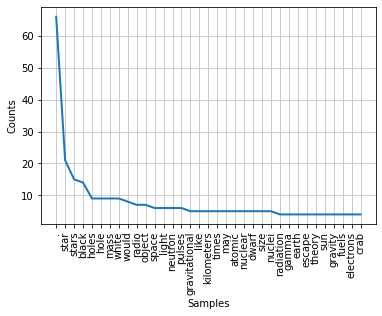

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [43]:
fdist.plot(35,cumulative=False)

# С параметром cumulative=False график иллюстрирует закон Ципфа
**Закон Ципфа** («ранг—частота»). Например, Если все слова достаточно длинного текста упорядочить по убыванию частоты их использования, то частота n-го слова в таком списке окажется приблизительно обратно пропорциональной его порядковому номеру n.
Второе по используемости слово встречается примерно в два раза реже, чем первое, третье — в три раза реже, чем первое, и т.д.

In [44]:
# from IPython.display import Image
# from IPython.core.display import HTML 
# Image(url= "https://ic.pics.livejournal.com/eponim2008/17443609/234916/234916_original.jpg")

$f = \frac{a}{r}$

$f$ – частота типа, $r$  – ранг типа, $a$  – параметр, для славянских языков – около 0.07

![zipf](https://i.pics.livejournal.com/eponim2008/17443609/234916/234916_original.jpg)

https://github.com/ancatmara/data-science-nlp/blob/master/1.%20Intro.ipynb

Закон назван именем американского лингвиста Джорджа Ципфа (правда, популяризировал он данную закономерность не для лингвистических данных, а для описания распределения экономических сил и социального статуса).

Если закон Ципфа соблюдается — значит, перед вами нормальный текст на естественном языке. Если нет, то что-то с ним не так.

# Визуализация

In [45]:
from wordcloud import WordCloud

In [46]:
import sys
print(sys.executable)

/Users/eldaroid/anaconda3/bin/python


In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
text_raw = " ".join(text)

In [49]:
wordcloud = WordCloud().generate(text_raw)

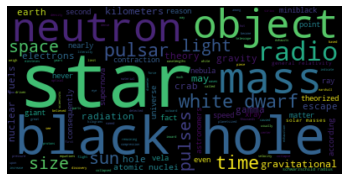

In [50]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Векторизация
Создаем векторы документа и строим итоговую матрицутермы-на-документы.

In [51]:
text = " ".join(word for word in text)
text = text.replace(" .", ".")
# print(text)

[Регулярное выражение](https://habr.com/ru/company/Voximplant/blog/446738/) (регулярки, regexp, regex) – это последовательность символов, которая определяет шаблон поиска. Например:

In [52]:
text = re.split('(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', text)
print(text)

['combat arms grove way castro valley california telephone following material downloaded nasa spacelink bbs national aeronautics space administration george.', 'marshall space flight center marshall space flight center alabama.', 'much black holes meets eye.', 'fact eyes even aid advanced telescope never see black hole space.', 'reason matter within black hole dense great gravitational pull prevents even light escaping.', 'like electromagnetic radiation radio waves infrared rays ultraviolet radiation xrays gamma radiation light fastest traveler universe.', 'moves nearly kilometers miles second.', 'speed could circle earth seven times heartbeats.', 'light cant escape black hole follows nothing else.', 'consequently direct way detect black hole.', 'fact principal evidence existence black holes comes observation solutions complex equations based einsteins theory general relativity.', 'among things calculations indicate black holes may occur variety sizes abundant us realize.', 'mini black

In [53]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(min_df=2, max_df=0.5, ngram_range = (1,2))
features = count_vectorizer.fit_transform(text)

pd.DataFrame(
    features.todense(),
    columns = count_vectorizer.get_feature_names()
)

,according,among,astronomers,atomic,atomic nuclei,based,believed,black,black hole,black holes,...,waves,way,weigh,white,white dwarf,white dwarfs,would,would weigh,xray,years
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# TF-IDF

[TF-IDF с примерами кода: просто и понятно](http://nlpx.net/archives/57) (сокращение от term frequency — inverse document frequency) – это статистическая мера для оценки важности слова в документе, который является частью коллекции или корпуса.

Скоринг по TF-IDF растет пропорционально частоте появления слова в документе, но это компенсируется количеством документов, содержащих это слово.

Формула скоринга для слова X в документе Y:

![d](http://3.bp.blogspot.com/-u928a3xbrsw/UukmRVX_JzI/AAAAAAAAAKE/wIhuNmdQb7E/s1600/td-idf-graphic.png)

TF (term frequency — частота слова) – отношение числа вхождений слова к общему числу слов документа.

![](https://habrastorage.org/r/w1560/webt/ai/p0/wk/aip0wkqcynj8q1cxwxlufspqqds.png)

IDF (inverse document frequency — обратная частота документа) — инверсия частоты, с которой некоторое слово встречается в документах коллекции.

![](https://habrastorage.org/webt/6j/xd/32/6jxd32ydlpkmixkjw6hdgmp6f6m.png)

В итоге, вычислить TF-IDF для слова term можно так:

![](https://habrastorage.org/webt/hl/tp/n0/hltpn0vg_gdo8bn1pfimbvu60no.png)

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range = (1,2))
features = tfidf_vectorizer.fit_transform(text)

pd.DataFrame(
    features.todense(),
    columns = tfidf_vectorizer.get_feature_names()
)

,according,among,astronomers,atomic,atomic nuclei,based,believed,black,black hole,black holes,...,waves,way,weigh,white,white dwarf,white dwarfs,would,would weigh,xray,years
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.609497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.397467,0.000000,0.490156,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.267841,0.316828,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.234437,0.277314,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65,0.382294,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
tfidf_vectorizer = TfidfVectorizer(ngram_range = (1,2))
features = tfidf_vectorizer.fit_transform(text)

df = pd.DataFrame(
    features.todense(),
    columns = tfidf_vectorizer.get_feature_names()
)

df.mean(axis=0).sort_values()

thermal energy    0.002076
lives long        0.002076
long              0.002076
long thermal      0.002076
sky               0.002076
                    ...   
mass              0.022124
white             0.025129
black             0.028281
stars             0.030955
star              0.034818
Length: 969, dtype: float64

In [56]:
tfidf_vectorizer = TfidfVectorizer(max_features=3, ngram_range = (1,2))
features = tfidf_vectorizer.fit_transform(text)

pd.DataFrame(
    features.todense(),
    columns = tfidf_vectorizer.get_feature_names()
)

,black,star,stars
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
62,0.0,1.0,0.0
63,0.0,1.0,0.0
64,0.0,1.0,0.0
65,0.0,0.0,0.0


В этой статье были разобраны основы NLP для текста, что безусловно полезно для курса "Программирование и лингвистические данные":

* Узнали что такое NLP? 
* узнали что оно позволяет применять алгоритмы машинного обучения для текста и речи;
* NLTK (Natural Language Toolkit)
* токенизация по предложениям
* токенизация по словам
* лемматизация и стемминг
* стоп-слова
* регулярное выражение
* скомпоновали предложения в слова
* векторизацию
* TF-IDF

Посмотреть эту работу и другие мои проекты можно на [гитхабе](https://github.com/eldaroid/nlp_text)